### Make OpenEO connection

In [1]:
import openeo
connection = openeo.connect("https://openeo.dataspace.copernicus.eu/").authenticate_oidc()

Authenticated using refresh token.


In [3]:
#Get desired data
from preprocessing import worldcereal_preprocessed_inputs

EXTENT = dict(zip(["west", "south", "east", "north"], [5.191984, 51.256920, 5.215158, 51.267661]))
EXTENT['crs'] = "EPSG:4326"

STARTDATE = '2020-11-01'
ENDDATE = '2021-10-31'

# Set OpenEO classification UDF context based on settings
CONTEXT = {
    "startdate": STARTDATE,  # Required
    "enddate": ENDDATE,      # Required
}

input_cube = worldcereal_preprocessed_inputs(
     connection,
     EXTENT,
     STARTDATE,
     ENDDATE,
     METEO_collection=None,
     S2_collection= "SENTINEL2_L2A",
     S1_collection= "SENTINEL1_GRD",
     DEM_collection= "COPERNICUS_30"
)


In [5]:
from datetime import datetime

current_datetime = datetime.now()
formatted_datetime = current_datetime.strftime("%Y_%m_%d_%H_%M_%S")
outputfile = str(formatted_datetime) + '_output_worldcereal.nc'

udf = openeo.UDF.from_file("udf_worldcereal_inference.py")

prediction = input_cube.apply_neighborhood(
    process=udf,
    size=[
        {"dimension": "x", "value": 100, "unit": "px"},
        {"dimension": "y", "value": 100, "unit": "px"},
    ],
    overlap=[
        {"dimension": "x", "value": 0, "unit": "px"},
        {"dimension": "y", "value": 0, "unit": "px"},
    ],
)

prediction = prediction.rename_labels(dimension="bands",target= ["output_catboost"])


prediction.execute_batch(outputfile = outputfile,
                        description='world cereal inference',
                        job_options={'driver-memory': '8g',
                                    'executor-memoryOverhead':'8g'} )


0:00:00 Job 'j-240508a1b54a4f7aa5618afbbf2e6865': send 'start'
0:00:17 Job 'j-240508a1b54a4f7aa5618afbbf2e6865': created (progress 0%)
0:00:22 Job 'j-240508a1b54a4f7aa5618afbbf2e6865': created (progress 0%)
0:00:29 Job 'j-240508a1b54a4f7aa5618afbbf2e6865': created (progress 0%)
0:00:37 Job 'j-240508a1b54a4f7aa5618afbbf2e6865': created (progress 0%)
0:00:47 Job 'j-240508a1b54a4f7aa5618afbbf2e6865': created (progress 0%)
0:01:00 Job 'j-240508a1b54a4f7aa5618afbbf2e6865': created (progress 0%)
0:01:15 Job 'j-240508a1b54a4f7aa5618afbbf2e6865': created (progress 0%)
0:01:35 Job 'j-240508a1b54a4f7aa5618afbbf2e6865': running (progress N/A)
0:01:59 Job 'j-240508a1b54a4f7aa5618afbbf2e6865': running (progress N/A)
0:02:29 Job 'j-240508a1b54a4f7aa5618afbbf2e6865': running (progress N/A)
0:03:07 Job 'j-240508a1b54a4f7aa5618afbbf2e6865': running (progress N/A)


(126, 166)

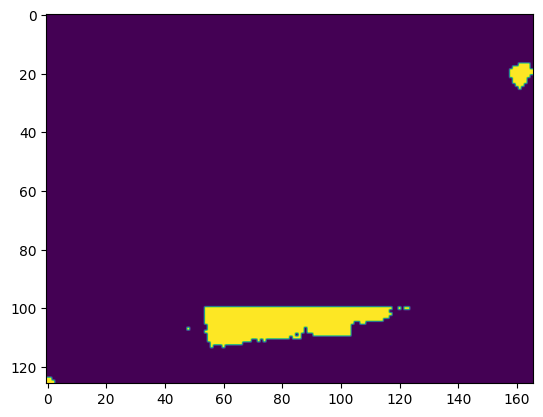

In [7]:
import xarray as xr
import matplotlib.pyplot as plt

output = xr.open_dataset('test_output_worldcereal.nc')
output = output['B02'].to_numpy().squeeze()
plt.imshow(output)

output.shape

### Check reference

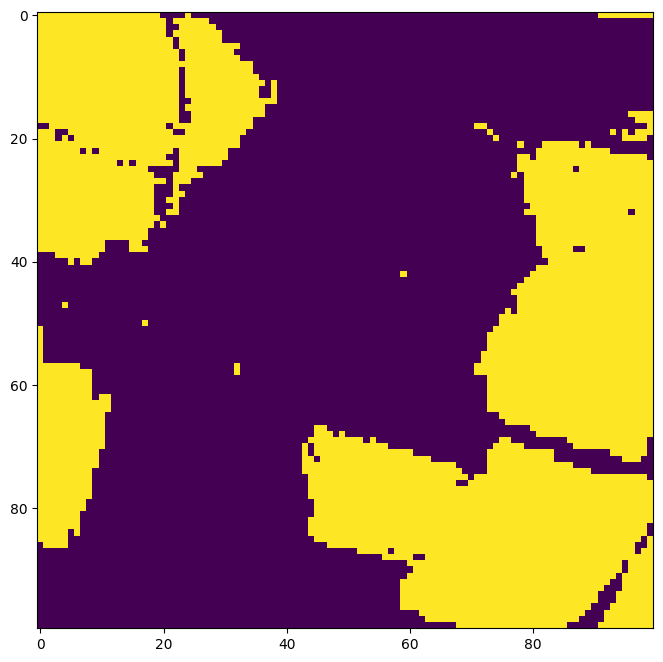